In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [5]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


**- Rename the columns**

In [6]:
df = df.rename(columns={'NAMA RUMAH': 'Address', 'HARGA': 'Price','LB': 'Building_Area','LT': 'Land_Area','KT': 'Bedroom_Count','KM': 'Bathroom_Count','GRS': "Garage"})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NO              1010 non-null   int64 
 1   House_Name      1010 non-null   object
 2   Price           1010 non-null   int64 
 3   Building_Area   1010 non-null   int64 
 4   Land_Area       1010 non-null   int64 
 5   Bedroom_Count   1010 non-null   int64 
 6   Bathroom_Count  1010 non-null   int64 
 7   Garage          1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [11]:
df.head()

,NO,House_Name,Price,Building_Area,Land_Area,Bedroom_Count,Bathroom_Count,Garage
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


**- Extract first two words from the House Name column**

In [12]:
df['House'] = df['House_Name'].apply(lambda x: ' '.join(str(x).split()[:2]))

In [9]:
# Remove unwanted columns name
df = df.rename(columns={'Address': 'House_Name'})

In [14]:
# delete column 'House_name'
df = df.drop('House_Name', axis=1)

In [16]:
# Move column 'House' to the second place
df.insert(1, 'House', df.pop('House'))

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NO              1010 non-null   int64 
 1   House           1010 non-null   object
 2   Price           1010 non-null   int64 
 3   Building_Area   1010 non-null   int64 
 4   Land_Area       1010 non-null   int64 
 5   Bedroom_Count   1010 non-null   int64 
 6   Bathroom_Count  1010 non-null   int64 
 7   Garage          1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [19]:
df.describe()

,NO,Price,Building_Area,Land_Area,Bedroom_Count,Bathroom_Count,Garage
count,1010.000000,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,505.500000,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,291.706188,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,1.000000,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,253.250000,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,505.500000,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,757.750000,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,1010.000000,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [20]:
# Drop the 'NO' column (not useful for prediction)
df = df.drop('NO', axis=1)

In [21]:
# Handle missing values (simple method)
df = df.dropna()

In [23]:
# Check data types
print(df.dtypes)

House             object
Price              int64
Building_Area      int64
Land_Area          int64
Bedroom_Count      int64
Bathroom_Count     int64
Garage             int64
dtype: object


**- Exploratory Data Analysis**

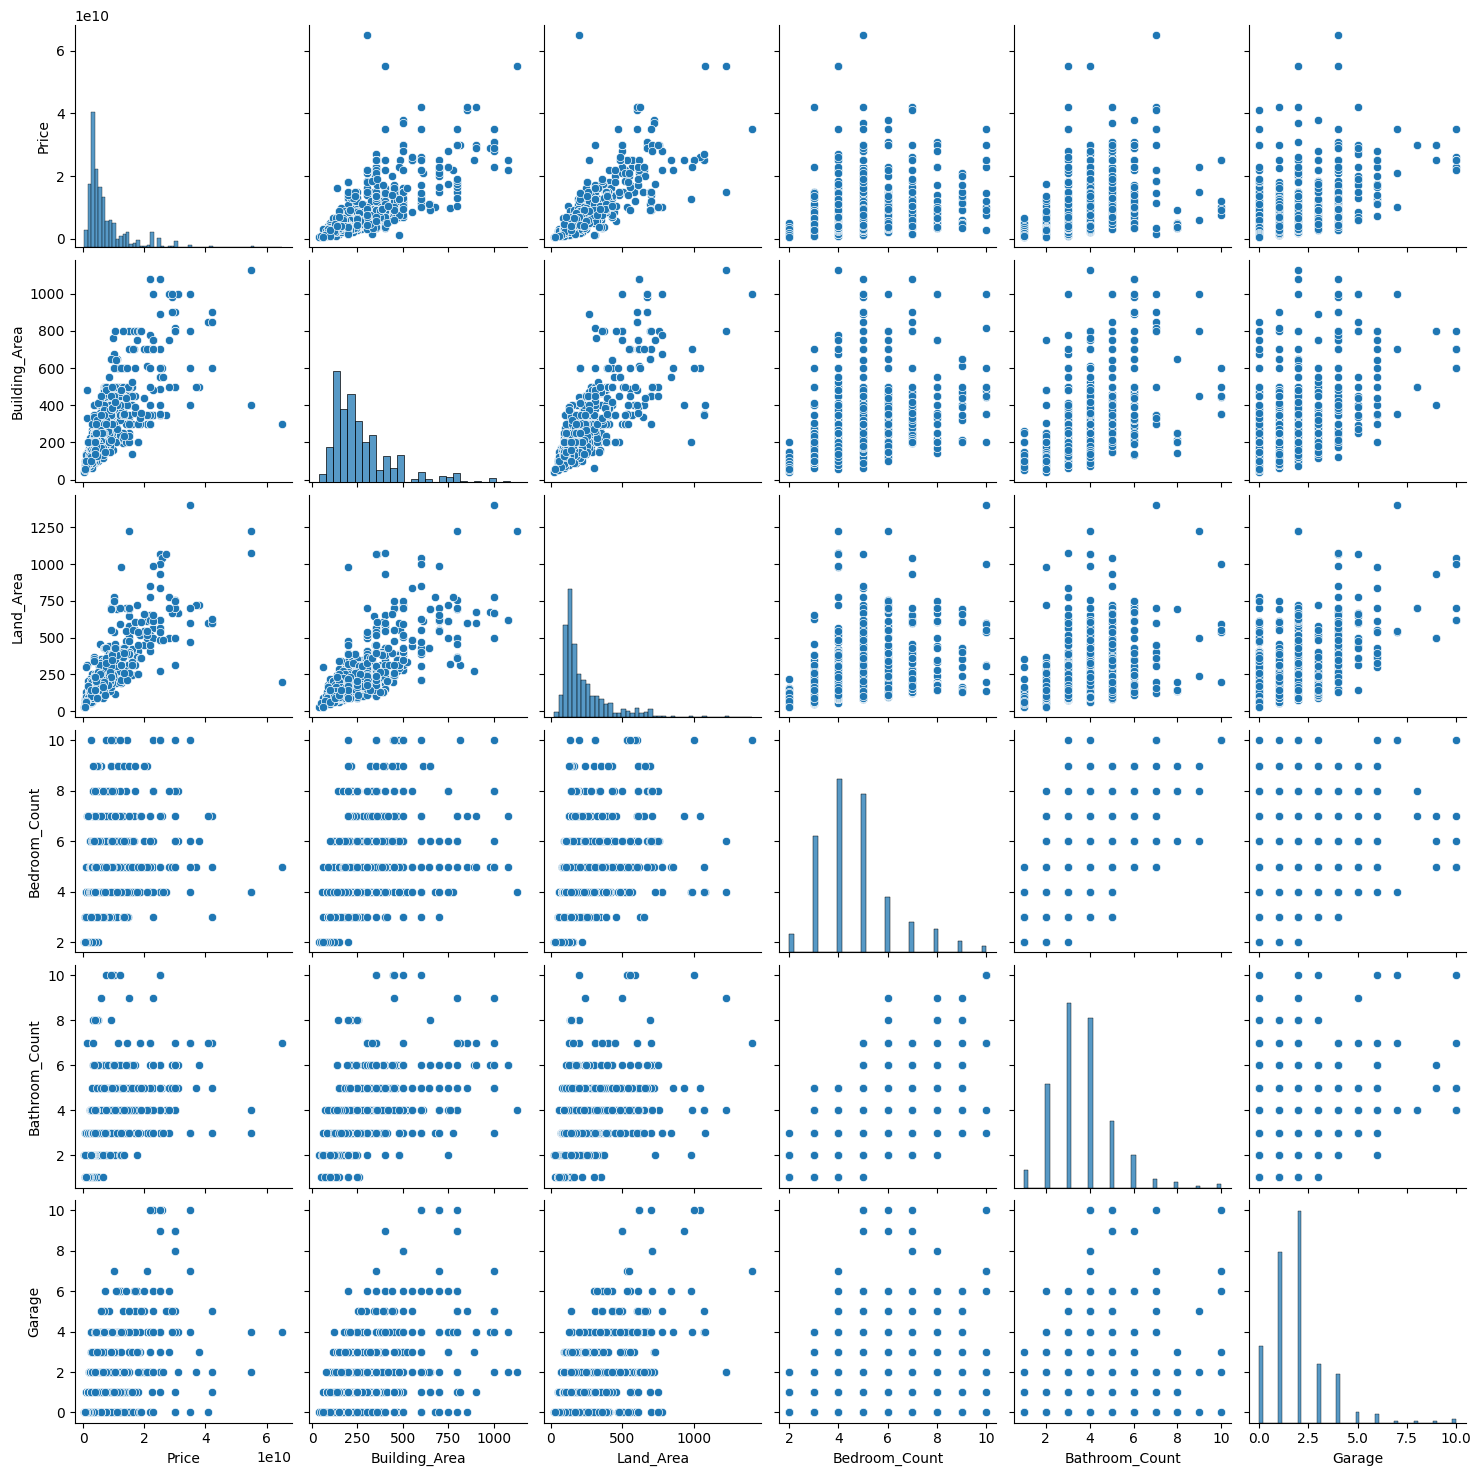

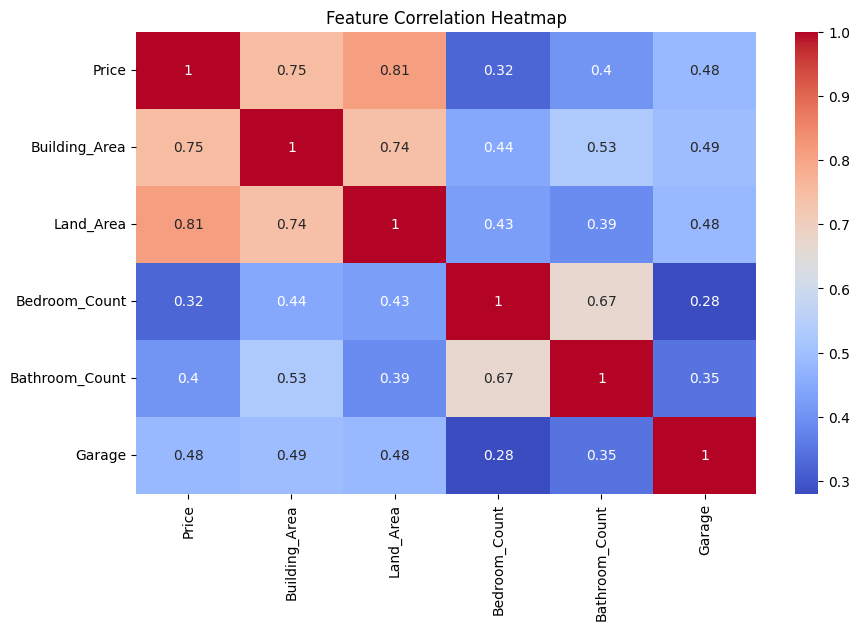

In [45]:
num_df = df.select_dtypes(include=['int64', 'float64'])
sns.pairplot(num_df)
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [46]:
df.head()

,House,Price,Building_Area,Land_Area,Bedroom_Count,Bathroom_Count,Garage
0,Rumah Murah,3800000000,220,220,3,3,0
1,Rumah Modern,4600000000,180,137,4,3,2
2,Rumah Mewah,3000000000,267,250,4,4,4
3,Rumah Baru,430000000,40,25,2,2,0
4,Rumah Bagus,9000000000,400,355,6,5,3


**- Train, test and split**

In [39]:
X = df[['Building_Area', 'Land_Area', 'Bedroom_Count', 'Bathroom_Count', 'Garage']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**- Train the ML model**

In [41]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

**- Evaluate the Model**

In [43]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.053357425736293e+19
R² Score: 0.7743586106138316


**- Visualize Actual vs Predicted Prices**

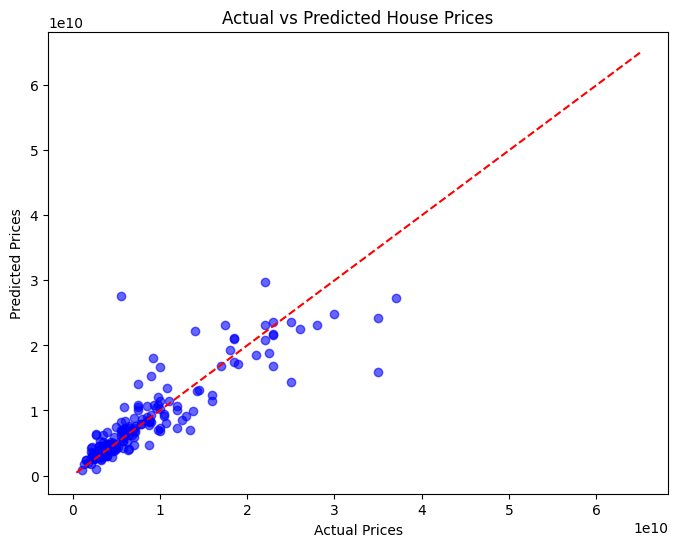

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

**- Predict New House Price**

In [50]:
new_house = pd.DataFrame({
    'Building_Area': [150],
    'Land_Area': [250],
    'Bedroom_Count': [3],
    'Bathroom_Count': [2],
    'Garage': [2]
})

predicted_price = model.predict(new_house)
print(f"🏠 Predicted House Price: {predicted_price[0]:,.0f}")

🏠 Predicted House Price: 5,688,111,111
